# Gini Coefficient

**Gini Coefficient:** A performance metric for binary classification models.

## Set Up

### Import Packages

In [1]:
# Packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

### Constants and Parameters

In [2]:
# constants
RANDOM_SEED = 42

# plotting defaults
sns.set_theme()
sns.set(font_scale=1.1)

### Generate Sample Data

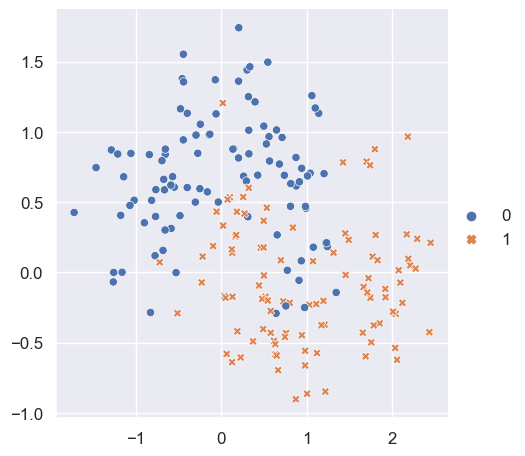

In [3]:
# generate sample data - 2 interleaving half circles
X, y = make_moons(n_samples=200, noise=0.3, random_state=RANDOM_SEED)

sns.relplot(x=X[:, 0], y=X[:, 1], hue=y, style=y);

### Sample Models

In [4]:
# train random forest classifier
forest_clf = RandomForestClassifier(
    n_estimators=500,
    max_leaf_nodes=16,
    n_jobs=-1,
    random_state=RANDOM_SEED,
)
forest_clf.fit(X, y)

y_pred = forest_clf.predict(X)
acc = accuracy_score(y, y_pred)
print("Training Accuracy: {:.2f}".format(acc))

Training Accuracy: 0.97


In [5]:
# train logistic regression
log_reg = LogisticRegression()
log_reg.fit(X, y)

y_pred = log_reg.predict(X)
acc = accuracy_score(y, y_pred)
print("Training Accuracy: {:.2f}".format(acc))

Training Accuracy: 0.83


## Gini Coefficient

### Summary?

**Kendall Rank Correlation Coefficient:** (or *Kendall's $\tau$ Coefficient*) A measure of *ordinal association* between two random variables
- Between -1 and 1
- For a sample, $\tau$ will be high when observations have a similar rank (relative position in a sample)

---

Take a sample $(\mathbf{x}, \mathbf{y})=(x_1, y_1),\ldots, (x_n, y_n)$ of observations of a pair $X, Y$ of random variables.

### Concordance

A pair of observations $(x_i, y_i)$ and $(x_j, y_j)$ with $i<j$ are *concordant* if the $x$s and $y$s have the same relative position; that is, if
- $x_i < x_j$ and $y_i < y_j$; or
- $x_i > x_j$ and $y_i > y_j$.

They are called *discordant* if:
- $x_i < x_j$ and $y_i > y_j$; or
- $x_i > x_j$ and $y_i < y_j$.

If $x_i=x_j$ or $y_i=y_j$ they are neither concordanct or discordant.

### Kendell's $\tau$ Coefficient

#### For Samples

The *Kendall Rank Correlation Coefficient* or *Kendall's $\tau$ Coefficient* for a sample $(\mathbf{x}, \mathbf{y})$

\begin{equation}
    \tau = \tau(\mathbf{x}, \mathbf{y}) = \frac{n_c - n_d}{\binom{n}{2}}
\end{equation}

where $n_c$ and $n_d$ are the number of concordant and discordant pairs, respectively (and $\binom{n}{2}$ is the total number of pairs).

A more explicit formulation is

\begin{equation}
     \tau(\mathbf{x}, \mathbf{y}) = \frac{2}{n(n-1)} \sum_{i<j} \text{sgn}(x_i - x_j)~\text{sgn}(y_i - y_j),
\end{equation}

where we set $\text{sgn}(0)=0$.

**Properties**
- $\tau$ takes values between -1 and 1
- $\tau = 1$ if the agreement between the two rankings is perfect
- $\tau = -1$ if the disagreement between the two rankings is perfect

##### Example?

#### For Distributions

Following the explicit formulation, we define Kendall's $\tau$ for $(X, Y)$ as

\begin{align}
     \tau(X, Y) 
         & = E\big(\text{sgn}(X_1 - X_2) \cdot \text{sgn}(Y_1 - Y_2)\big) \\
         & = P\big(\text{sgn}(X_1 - X_2) = \text{sgn}(Y_1 - Y_2)\big) 
             - P\big(\text{sgn}(X_1 - X_2) \neq \text{sgn}(Y_1 - Y_2)\big),
\end{align}

where $(X_1, Y_1)$ and $(X_2, Y_2)$ are independent bivariate random variables with the sample distributions as $(X, Y)$.

**Properties**
- If $X$ and $Y$ are independent then $\tau(X, Y)=0$
- $\tau(X, X) = P\left( X_1\neq X_2\right)$, so if $X$ is continuous then $\tau(X, X)=1$, otherwise (if $X$ has point masses) $\tau(X, X) < 1$

#### For Binary Variables

Suppose that $X$ and $Y$ are binary variables. Then we can rewrite

\begin{align}
    \tau(X, Y) 
        & = P\big((X_1=0, X_2=1, Y_1=0, Y_2=1)\cup(X_1=1, X_2=0, Y_1=1, Y_2=0)\big) \\
        & \qquad - P\big((X_1=0, X_2=1, Y_1=1, Y_2=0)\cup(X_1=1, X_2=0, Y_1=0, Y_2=1)\big) \\
        & = 2\big[ P\left(X_1=0, X_2=1, Y_1=0, Y_2=1\right) - P\left(X_1=0, X_2=1, Y_1=1, Y_2=0\right)\big] \\
        & = 2\big[ P\left(X_1=0, Y_1=0\right) \cdot P\left(X_2=1, Y_2=1\right) 
            - P\left(X_1=0, Y_1=1\right) \cdot P\left(X_2=1, Y_2=0\right)\big] \\
        & = 2\big[ P\left(X=0, Y=0\right) \cdot P\left(X=1, Y=1\right) - P\left(X=0, Y=1\right) \cdot P\left(X=1, Y=0\right)\big].
\end{align}

In particular,

\begin{equation}
    \tau(X, X) = 2P\left( X=0 \right) \cdot P\left( X=1 \right).
\end{equation}

### Somers' D

#### For Samples

Define *Somers' D* of $\mathbf{y}$ with respect to $\mathbf{x}$ by

\begin{equation}
    D_{\mathbf{y}\mathbf{x}} = \frac{\tau(\mathbf{x}, \mathbf{y})}{\tau(\mathbf{x}, \mathbf{x})}.
\end{equation}

Note that pairs in $(\mathbf{x}, \mathbf{x})$ are never discordant - $(x_i, x_i)$ and $(x_j, x_j)$ are concordant if and only if $x_i\neq x_j$. So $D_{\mathbf{y}\mathbf{x}}$ is simply $n_c-n_d$ over the number of unequal pairs in $\mathbf{x}$.

**Properties**
- Unlike $\tau$, $D_{\mathbf{y}\mathbf{x}}$ *isn't* symmetric in $\mathbf{x}$ and $\mathbf{y}$

##### Example?

#### For Distributions

Define Somers' D of $Y$ with respect to $X$ by

\begin{equation}
    D_{YX} = \frac{E\big(\text{sgn}(X_1 - X_2) \cdot \text{sgn}(Y_1 - Y_2)\big)}{P(X_1\neq X_2)}.
\end{equation}

Using the probability formulation of Kendall's $\tau$ gives

\begin{align}
    D_{YX} 
        & = \frac{P\big(\text{sgn}(X_1 - X_2) = \text{sgn}(Y_1 - Y_2)\big) 
            - P\big(\text{sgn}(X_1 - X_2) \neq \text{sgn}(Y_1 - Y_2)\big)}{P(X_1\neq X_2)} \\
        & = P\big(\text{sgn}(X_1 - X_2) = \text{sgn}(Y_1 - Y_2) \,\big|\, X_1\neq X_2 \big) 
            - P\big(\text{sgn}(X_1 - X_2) \neq \text{sgn}(Y_1 - Y_2) \,\big|\, X_1\neq X_2 \big).
\end{align}

Note that $X$ is continuous then this coincides with Kendall's $\tau$.

#### For Binary Variables

If $X$ and $Y$ are binary variables then, using the binary formulation of Kendall's $\tau$,

\begin{align}
    D_{YX}
        & = P(Y=1 \,|\, X=1) \cdot P(Y=0 \,|\, X=0) - P(Y=1 \,|\, X=0) \cdot P(Y=0 \,|\, X=1) \\
        & = P(Y=1 \,|\, X=1) \big( 1 - P(Y=1 \,|\, X=0)\big) - P(Y=1 \,|\, X=0) \big( 1- \cdot P(Y=1 \,|\, X=1)/big) \\
        & = P(Y=1 \,|\, X=1) - P(Y=1 \,|\, X=0).
\end{align}

## Cumulative Accuracy Profile (CAP) Curve

Consider a binary classification task. We reorder the samples by decreasing confidence that the label is positive. So we start with samples we are sure are positive and end with samples we are sure are negative. We then go through the samples, count how many *are* positive, and plot number of samples against number of positive samples. This is called the *Cumulative Accuracy Profile Curve*.

Let $N$ denote the total number of samples and $N_+$ denote the number of positive samples. A perfect model would accurately put all positive samples first, so the curve would be diagonal from $(0, 0)$ to $(N_+, N_+)$. We would expect a random model to be a straight line from $(0,0)$ to $(N, N_+)$.

We can evaluate a classifier by comparing its CAP curve against a perfect and a random model. This works best when the model can generate prediction probabilities.

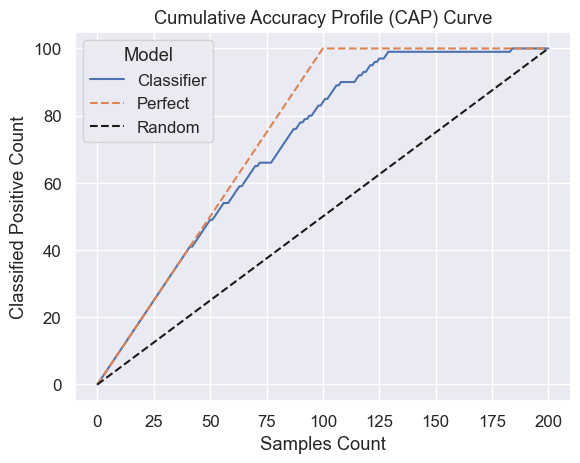

In [7]:
from cap import plot_cap_curve

plot_cap_curve(log_reg, X, y, method="predict_proba", normalised=False)

We often normalise the axes to [0, 1] to make comparisons easier.

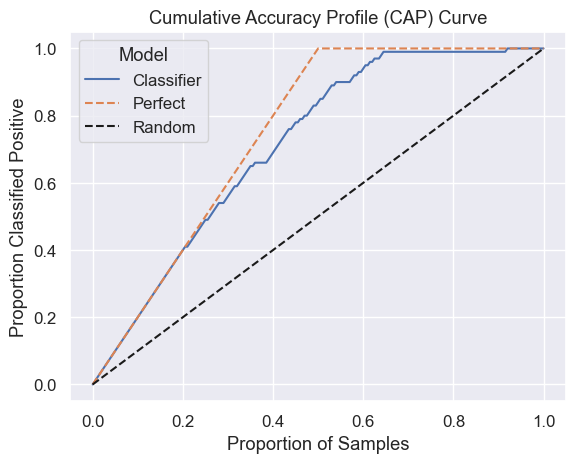

In [8]:
plot_cap_curve(log_reg, X, y, method="predict_proba", normalised=True)

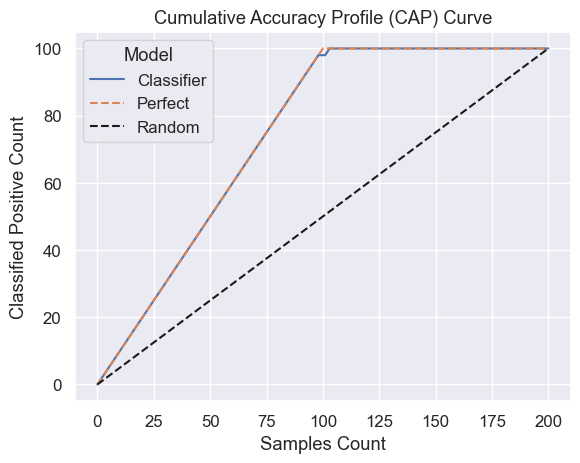

In [10]:
plot_cap_curve(forest_clf, X, y, method="predict", normalised=False)